In [243]:
# %load sample.py
#!/usr/bin/env python3

import requests
from bs4 import BeautifulSoup as BS
import re
from collections import defaultdict
import json
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

regex = re.compile('SIRO-\d+')
d = defaultdict(list)

def get_data():
	for n in range(1, 14):
		url = 'http://sukebei.nyaa.eu/?page=search&term=siro&offset=%d' %n
		soup = BS(requests.get(url).text, 'html.parser')
		titles = (x.find('a').text for x in soup.findAll('td', {"class": "tlistname"}) \
	     	     if regex.search(x.find('a').text))

		snatches = (x.text for x in soup.findAll('td', {"class": "tlistdn"}))	
		for t, s in zip(titles, snatches):
			d[regex.search(t).group()].append(s)

		data = {key: max(d[key]) for key in d}
		with open('data.json', 'w') as fp:
			json.dump(data, fp)


with open('data.json', 'r') as fp:
	data = json.load(fp)
s = Series(data, dtype=np.int32)

<IPython.core.display.Javascript object>


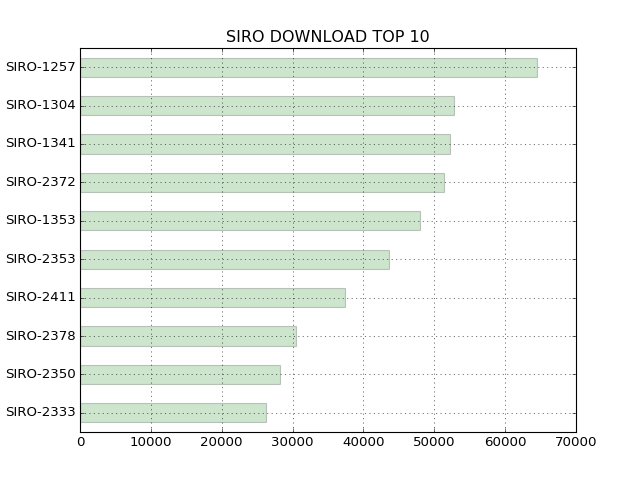

In [248]:
s.sort_values(inplace=True)
s.tail(10).plot.barh(alpha=0.2, color='green', grid=True, title='SIRO DOWNLOAD TOP 10', label='snatches')
plt.show()